In [1]:
from utils.solver import solve_SCRMFT, solve_woods_saxon_RMFT
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rc('figure', figsize=(6, 6))

In [2]:
# input_file = pd.read_excel('./input_files/O16_RMF.xlsx', sheet_name=None)
input_file = pd.read_excel('./input_files/Ca40_RMF.xlsx', sheet_name=None)
# input_file = pd.read_excel('./input_files/Pb208_RMF.xlsx', sheet_name=None)

Important to note that sometimes code fails because match radius might be too close to a node. If we get error that there is an invalid quantity inside a square root, then see which energy failed and play around with the match radius until it works.

At the moment, I am using the SAME r_middle for every wavefunction. If r_middle is different for each wavefuction, then the radial grid each single particle wavefunction is evaluated at is DIFFERENT. The code I have written ASSUMES the radial grids are all the SAME. Important to keep this in mind.

### WHEN TRANSFORMING INTO LIGHT FRONT, REMEMBER THAT YOUR POTENTIALS ARE ALL MULTIPLIED BY AN EXTRA FACTOR OF THE COUPLING!!!!

Note that the energy offset is important and the match radius has influence on if you reach the correct energy

In [3]:
energy, wfk, scalar_pot, vector_pot, rho_pot, coulomb_pot = solve_SCRMFT(input_file)
# energy, wfk, scalar_pot, vector_pot, rho_pot, coulomb_pot = solve_woods_saxon_RMFT(input_file)


------------ ITERATION 0 ------------

--------------
NEUTRON STATES
--------------
----------------------------------------------------------------------------
1S1/2
Succesfully converged in 5 iterations, energy is : 889.7113626727433
The discontinuity in the u-wavefunction is: 7.121697997081178e-05
----------------------------------------------------------------------------
1P3/2
Succesfully converged in 4 iterations, energy is : 907.6648773125402
The discontinuity in the u-wavefunction is: -1.1579746905576727e-05
----------------------------------------------------------------------------
1P1/2
Succesfully converged in 8 iterations, energy is : 913.9302063335622
The discontinuity in the u-wavefunction is: -3.003327738293482e-05
----------------------------------------------------------------------------
1D5/2
Succesfully converged in 3 iterations, energy is : 924.8172385248133
The discontinuity in the u-wavefunction is: 3.065500344567873e-06
----------------------------------------

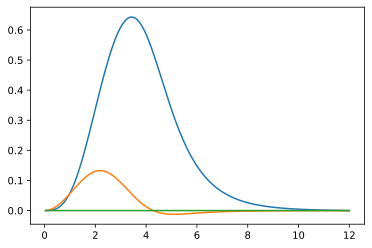

In [4]:
index = 5
r_array = wfk[index][0]
u_array = wfk[index][1]
v_array = wfk[index][2]

zero_line = [0] * len(r_array)
plt.plot(r_array,u_array)
plt.plot(r_array,v_array)
plt.plot(r_array,zero_line)




In [5]:
energy

array([[ 8.83614816e+02,  2.00000000e+00,  5.00000000e-01],
       [ 9.00101993e+02,  4.00000000e+00,  5.00000000e-01],
       [ 9.05820264e+02,  2.00000000e+00,  5.00000000e-01],
       [ 9.16254219e+02,  6.00000000e+00,  5.00000000e-01],
       [ 9.24608647e+02,  2.00000000e+00,  5.00000000e-01],
       [ 9.25122756e+02,  4.00000000e+00,  5.00000000e-01],
       [ 8.83614816e+02,  2.00000000e+00, -5.00000000e-01],
       [ 9.00101993e+02,  4.00000000e+00, -5.00000000e-01],
       [ 9.05820264e+02,  2.00000000e+00, -5.00000000e-01],
       [ 9.16254219e+02,  6.00000000e+00, -5.00000000e-01],
       [ 9.24608647e+02,  2.00000000e+00, -5.00000000e-01],
       [ 9.25122756e+02,  4.00000000e+00, -5.00000000e-01]])

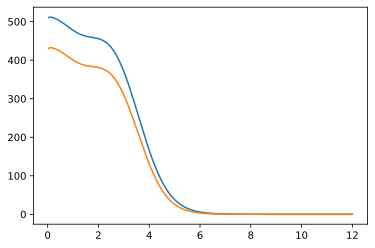

In [6]:
plt.plot(r_array,scalar_pot(r_array))
plt.plot(r_array,vector_pot(r_array))

ValueError: x and y must have same first dimension, but have shapes (300,) and (1,)

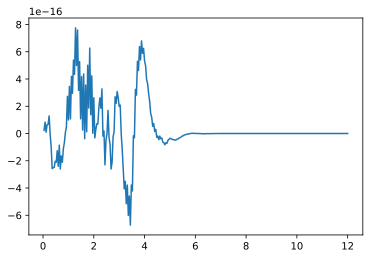

In [7]:
plt.plot(r_array,rho_pot(r_array))
plt.plot(r_array,coulomb_pot(r_array))